In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Setup visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

In [3]:
# Load Dataset
df = pd.read_csv("Netflix Dataset.csv")
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
# Having a look at the Dataset
print("Shape of Dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nInfo:")
df.info()
print("\nMissing Values:\n", df.isnull().sum())

Shape of Dataset: (7789, 11)

Columns: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB

Missing Values:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country   

In [5]:
# To deal with these missing values we can do one of two things:

# Option 1: Remove rows with missing values in them.
# df.dropna(inplace=True)
# df.isnull().sum()

# Option 2: Replace some missing values with Not Available or Not Specified
df['Director'] = df['Director'].fillna("Unknown")
df['Cast'] = df['Cast'].fillna("Unknown")
df['Country'] = df['Country'].fillna("Unknown")
df['Rating'] = df['Rating'].fillna("Not Rated")

# To remove any remaining Null Values (present in Release Date Column)
df.dropna(inplace=True)

df.isnull().sum()

,0
Show_Id,0
Category,0
Title,0
Director,0
Cast,0
Country,0
Release_Date,0
Rating,0
Duration,0
Type,0


In [6]:
# Convert Release_Date to datetime and Extracting Release_Year as new column
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Year'] = df['Release_Date'].dt.year

In [7]:
# Extract Main Genre (first genre listed in 'Type')
df['Main_Genre'] = df['Type'].apply(lambda x: x.split(",")[0].strip() if pd.notnull(x) else "Unknown")

In [8]:
# Checking the DataFrame after applying changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7779 entries, 0 to 7788
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7779 non-null   object        
 1   Category      7779 non-null   object        
 2   Title         7779 non-null   object        
 3   Director      7779 non-null   object        
 4   Cast          7779 non-null   object        
 5   Country       7779 non-null   object        
 6   Release_Date  7691 non-null   datetime64[ns]
 7   Rating        7779 non-null   object        
 8   Duration      7779 non-null   object        
 9   Type          7779 non-null   object        
 10  Description   7779 non-null   object        
 11  Year          7691 non-null   float64       
 12  Main_Genre    7779 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 850.8+ KB


In [9]:
# Some Exploratory Data Analysis

# Count of Movies vs TV Shows
print("\nCategory Distribution:\n", df['Category'].value_counts())

# Top Countries
print("\nTop 5 Countries:\n", df['Country'].value_counts().head(5))

# Dataset span (years)
print("\nDataset covers years from:", df['Year'].min(), "to", df['Year'].max())


Category Distribution:
 Category
Movie      5379
TV Show    2400
Name: count, dtype: int64

Top 5 Countries:
 Country
United States     2550
India              923
Unknown            506
United Kingdom     396
Japan              225
Name: count, dtype: int64

Dataset covers years from: 2008.0 to 2021.0


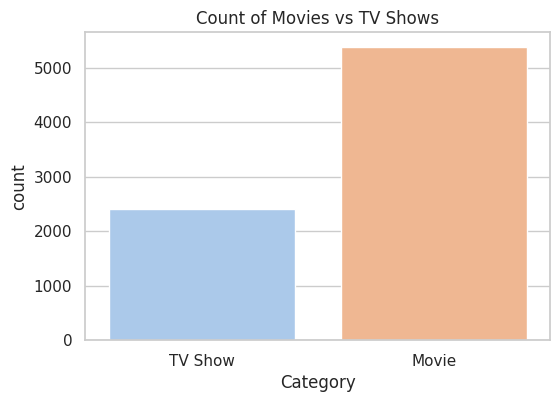

In [10]:
# Visualization of values in Category, i.e. Movies vs TV Shows

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Category',  palette='pastel')
plt.title("Count of Movies vs TV Shows")
plt.show()

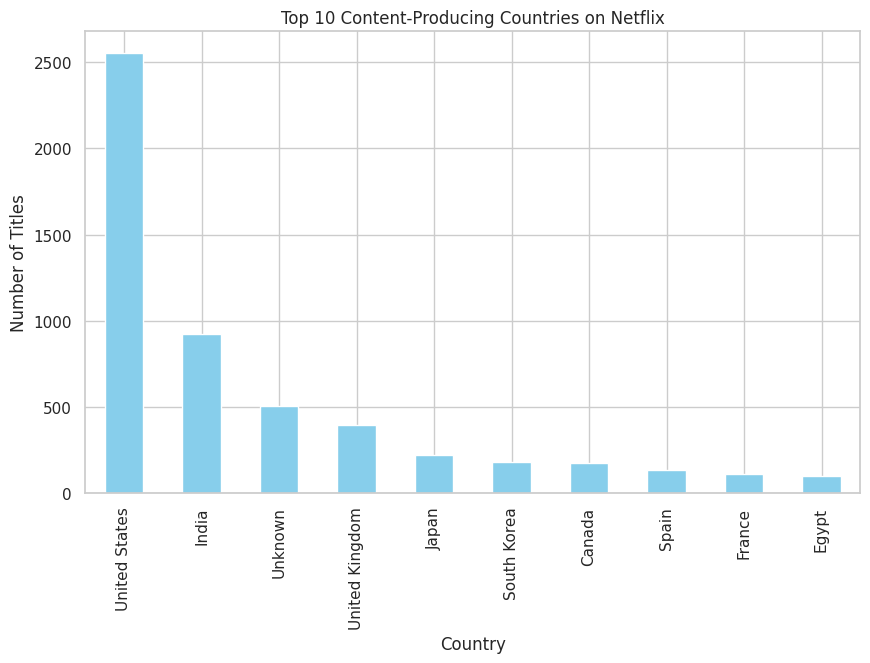

In [11]:
# Top 10 countries producing Netflix content
plt.figure(figsize=(10,6))
df['Country'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Content-Producing Countries on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()

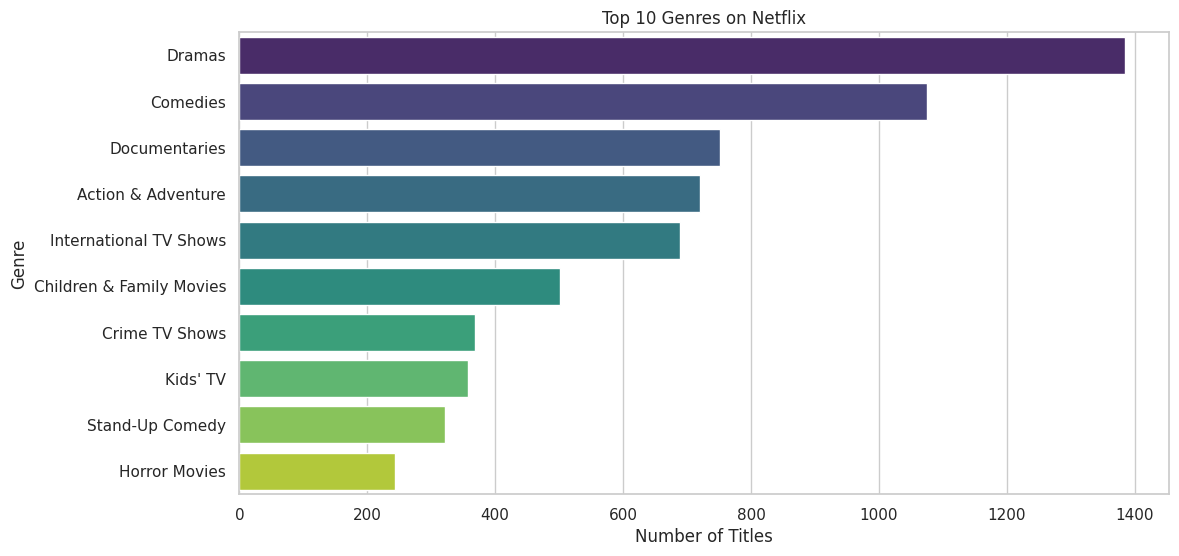

In [12]:
# Top 10 Genres
top_genres = df['Main_Genre'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

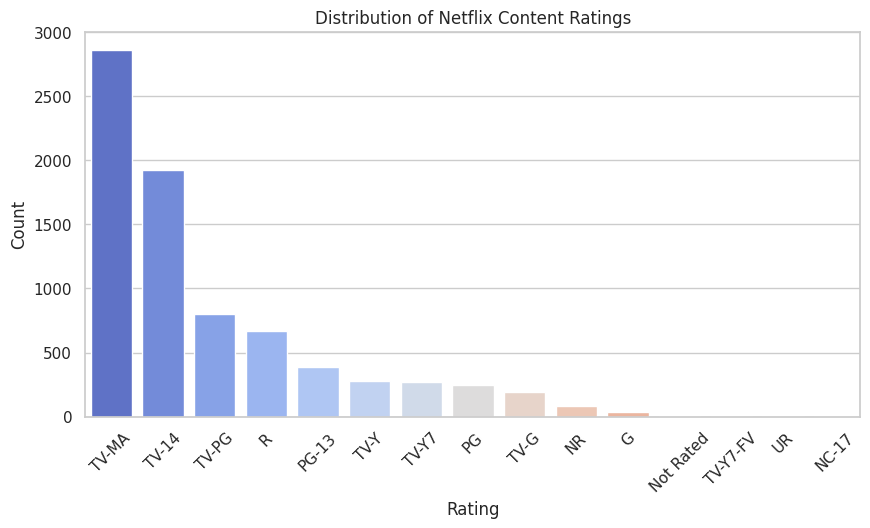

In [13]:
# Distribution of differnt content ratings on Netflix
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Rating', order=df['Rating'].value_counts().index, palette='coolwarm')
plt.title("Distribution of Netflix Content Ratings")
plt.xticks(rotation=45)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

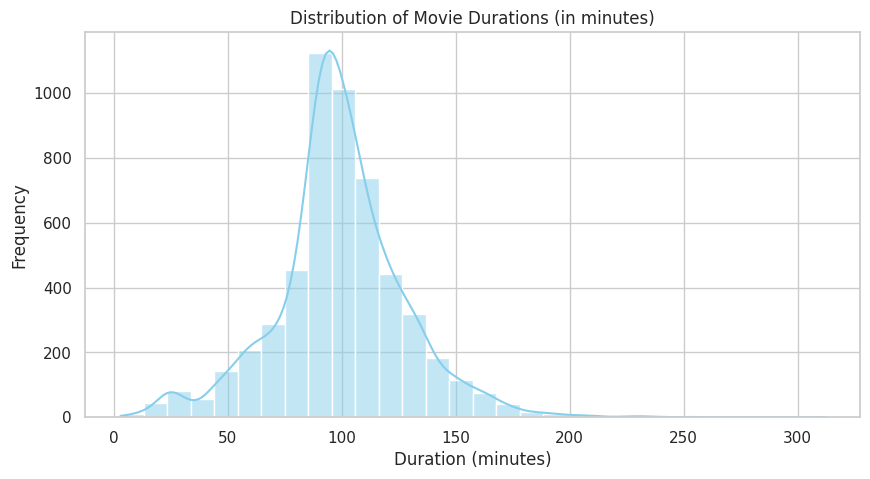

In [14]:
# Distribution of Time Duration in movies
df_movies = df[df['Category'] == 'Movie'].copy()
df_movies['Duration_mins'] = df_movies['Duration'].str.extract('(\d+)').astype(float)
plt.figure(figsize=(10,5))
sns.histplot(df_movies['Duration_mins'].dropna(), bins=30, kde=True, color='skyblue')
plt.title("Distribution of Movie Durations (in minutes)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

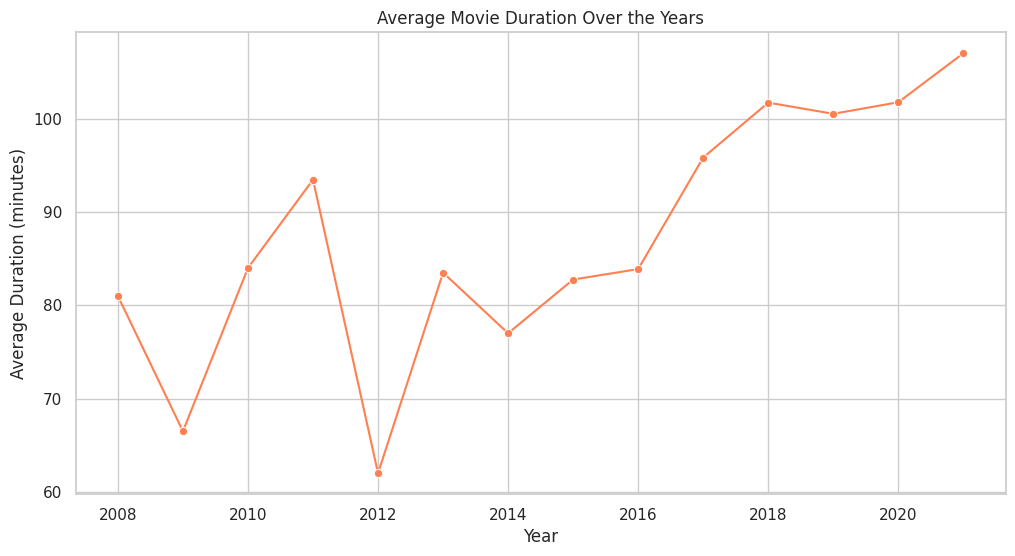

In [15]:
# Change in Average Movie Duration over the years
movie_duration = df_movies.groupby('Year')['Duration_mins'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=movie_duration, x='Year', y='Duration_mins', color='coral', marker='o')
plt.title('Average Movie Duration Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Duration (minutes)')
plt.grid(True)
plt.show()

In [16]:
print("\n📈 Key Insights Summary:")
print("1. The number of Movies is higher than TV Shows, but TV content has increased recently.")
print("2. USA dominates Netflix’s catalog, followed by India and UK.")
print("3. Top genres include Dramas, Documentaries, and Comedies.")
print("4. Most content is rated TV-MA, indicating adult audiences.")
print("5. Average movie duration is around 100 minutes and is stable over the years.")


📈 Key Insights Summary:
1. The number of Movies is higher than TV Shows, but TV content has increased recently.
2. USA dominates Netflix’s catalog, followed by India and UK.
3. Top genres include Dramas, Documentaries, and Comedies.
4. Most content is rated TV-MA, indicating adult audiences.
5. Average movie duration is around 100 minutes and is stable over the years.
